<a href="https://colab.research.google.com/github/joeljacson/machine-learning/blob/main/water_level_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle (11).json to kaggle (11) (1).json


{'kaggle (11) (1).json': b'{"username":"joeljacsonjamesgopi","key":"abc4369d822a95d7ecfcd4eb0d3dad56"}'}

In [ ]:
import os

# Check if the kaggle.json file is in the current directory
if 'kaggle.json' not in os.listdir():
    print("Please make sure you have uploaded the kaggle.json file.")
else:
    # Set up Kaggle API token
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json


Please make sure you have uploaded the kaggle.json file.


In [ ]:
!kaggle kernels pull mishra5001/eda-for-chennai-s-dripping-water-level

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!kaggle datasets download -d monkeyddonut/chennai-urban-flood-map-2015-raster-tif

Dataset URL: https://www.kaggle.com/datasets/monkeyddonut/chennai-urban-flood-map-2015-raster-tif
License(s): MIT
  0% 0.00/865k [00:00<?, ?B/s]
100% 865k/865k [00:00<00:00, 79.2MB/s]


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import zipfile

with zipfile.ZipFile('/content/chennai-urban-flood-map-2015-raster-tif.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
    zip_ref.close()


In [ ]:
!pip install rasterio matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 46.5 MB/s eta 0:00:00


#What It Is:
Urban Flood Map Raster: The ZIP file probably includes a TIFF raster file that represents flood extent or flood depth in Chennai for the year 2015. It’s used to analyze and visualize areas affected by flooding.

Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 2352, 'height': 2334, 'count': 1, 'crs': CRS.from_epsg(32644), 'transform': Affine(10.0, 0.0, 400457.74758325063,
       0.0, -10.0, 1444763.4685004705)}


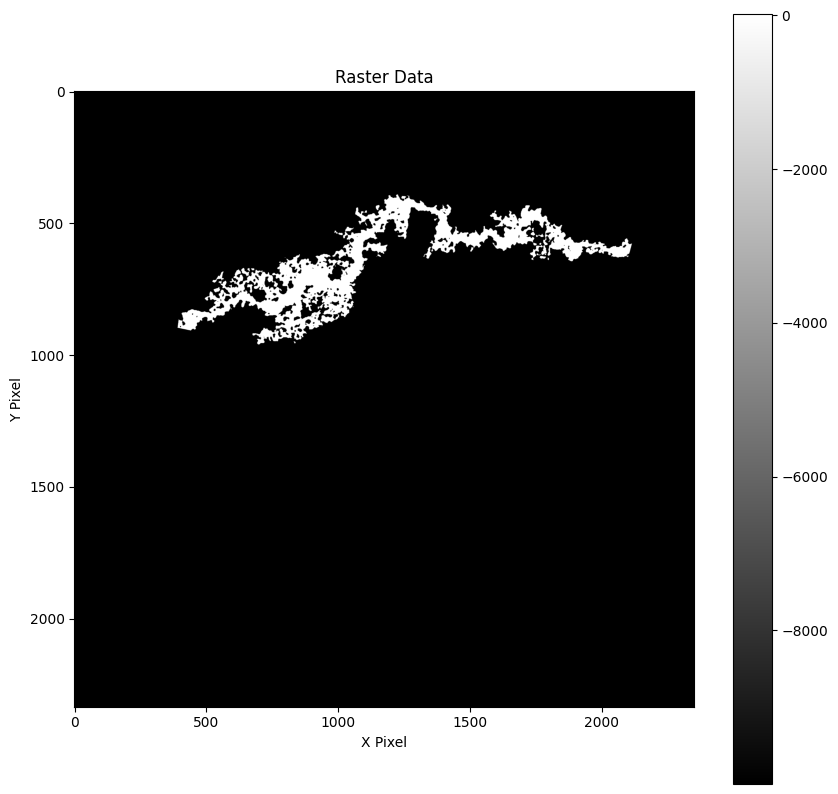

In [ ]:
import rasterio
import matplotlib.pyplot as plt

# Path to the TIFF file
tif_path = '/content/Depth (Max) (1).Terrain.needed_tif.tif'

# Open the TIFF file
with rasterio.open(tif_path) as src:
    # Read the data from the first band
    data = src.read(1)

    # Get metadata
    meta = src.meta
    print("Metadata:", meta)

# Plot the raster data
plt.figure(figsize=(10, 10))
plt.imshow(data, cmap='gray')  # Use 'gray' colormap for single-band raster
plt.colorbar()
plt.title('Raster Data')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()


#Urban Flood Map Raster: Shows areas affected by flooding in Chennai for 2015.


In [ ]:
import numpy as np

# Calculate basic statistics
mean = np.mean(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)

print(f"Mean: {mean}")
print(f"Standard Deviation: {std_dev}")
print(f"Min Value: {min_value}")
print(f"Max Value: {max_value}")


Mean: -9691.0888671875
Standard Deviation: 1727.650390625
Min Value: -9999.0
Max Value: 18.85500717163086


In [ ]:
import rasterio

# Path to the TIFF file
tif_path = '/content/Depth (Max) (1).Terrain.needed_tif.tif'

# Open the TIFF file
with rasterio.open(tif_path) as src:
    # Read the data from the first band
    data = src.read(1)

    # Get metadata
    meta = src.meta
    print("Metadata:", meta)


Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 2352, 'height': 2334, 'count': 1, 'crs': CRS.from_epsg(32644), 'transform': Affine(10.0, 0.0, 400457.74758325063,
       0.0, -10.0, 1444763.4685004705)}


In [ ]:
import numpy as np

# Compute basic statistics or features from the raster data
mean_value = np.mean(data)
std_dev = np.std(data)
min_value = np.min(data)
max_value = np.max(data)

# Create features for modeling
features = {
    'mean': mean_value,
    'std_dev': std_dev,
    'min': min_value,
    'max': max_value
}

print("Features:", features)


Features: {'mean': -9691.089, 'std_dev': 1727.6504, 'min': -9999.0, 'max': 18.855007}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example data with multiple rows
# Replace these lists with your actual data
data = {
    'mean': [10, 12, 14, 16, 18],       # Example mean values
    'std_dev': [1.2, 1.5, 1.8, 1.9, 2.0],  # Example standard deviation values
    'min': [8, 9, 10, 11, 12],           # Example min values
    'max': [15, 17, 18, 20, 22],         # Example max values
    'target': [100, 110, 120, 130, 140]  # Example target values (e.g., future water levels)
}

df = pd.DataFrame(data)

# Define features and target
X = df[['mean', 'std_dev', 'min', 'max']]
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


RMSE: 0.2723146747352416


In [ ]:
# Fill missing values (if any)
df.fillna(method='ffill', inplace=True)


<ipython-input-23-26b414a3f244>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# Example new data for prediction
new_data = {
    'mean': [20],
    'std_dev': [2.1],
    'min': [14],
    'max': [25]
}

new_df = pd.DataFrame(new_data)
future_prediction = model.predict(new_df)

print(f"Predicted target value: {future_prediction[0]}")


Predicted target value: 152.29954614220878


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-validated RMSE: {-scores.mean()}")


Cross-validated RMSE: 0.09116018265347633


In [ ]:
future_data = {
    'mean': [25],
    'std_dev': [2.5],
    'min': [18],
    'max': [28]
}

future_df = pd.DataFrame(future_data)
future_prediction = model.predict(future_df)

print(f"Predicted future value: {future_prediction[0]}")


Predicted future value: 179.04689863842663


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl')

# Load the model (in a different session)
model = joblib.load('model.pkl')


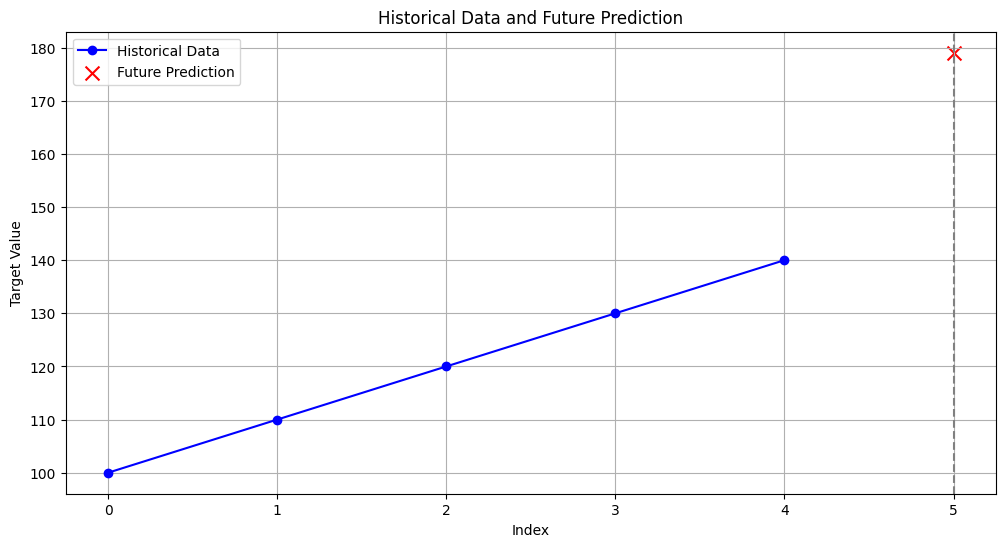

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example historical data (replace with your actual historical data)
historical_data = {
    'mean': [10, 12, 14, 16, 18],
    'std_dev': [1.2, 1.5, 1.8, 1.9, 2.0],
    'min': [8, 9, 10, 11, 12],
    'max': [15, 17, 18, 20, 22],
    'target': [100, 110, 120, 130, 140]
}

# Create DataFrame from historical data
historical_df = pd.DataFrame(historical_data)

# Plot historical data
plt.figure(figsize=(12, 6))

# Plot historical target values as a line
plt.plot(historical_df.index, historical_df['target'], marker='o', color='blue', label='Historical Data')

# Plot the future prediction
future_index = len(historical_df)
plt.scatter(future_index, future_target, color='red', marker='x', s=100, label='Future Prediction')

# Add a vertical line to indicate the position of the future prediction
plt.axvline(x=future_index, color='gray', linestyle='--')

# Plot labels and title
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Historical Data and Future Prediction')
plt.legend()
plt.grid(True)
plt.show()


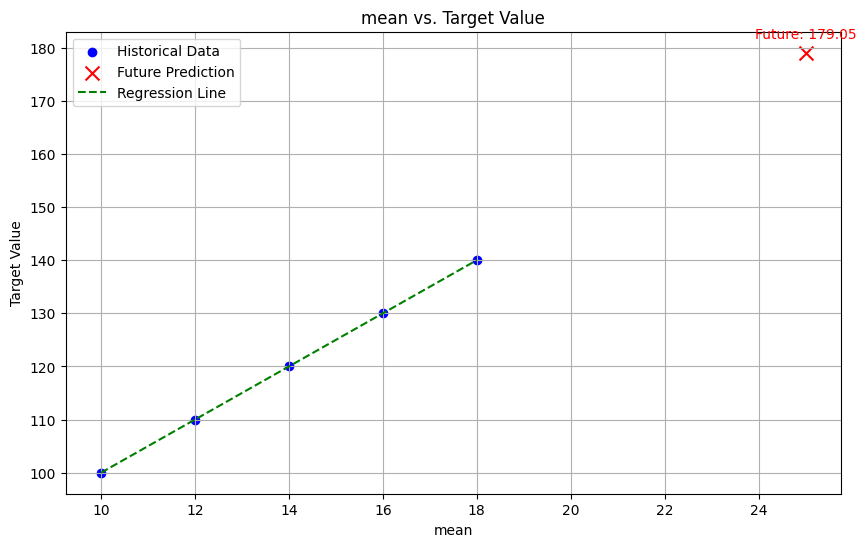

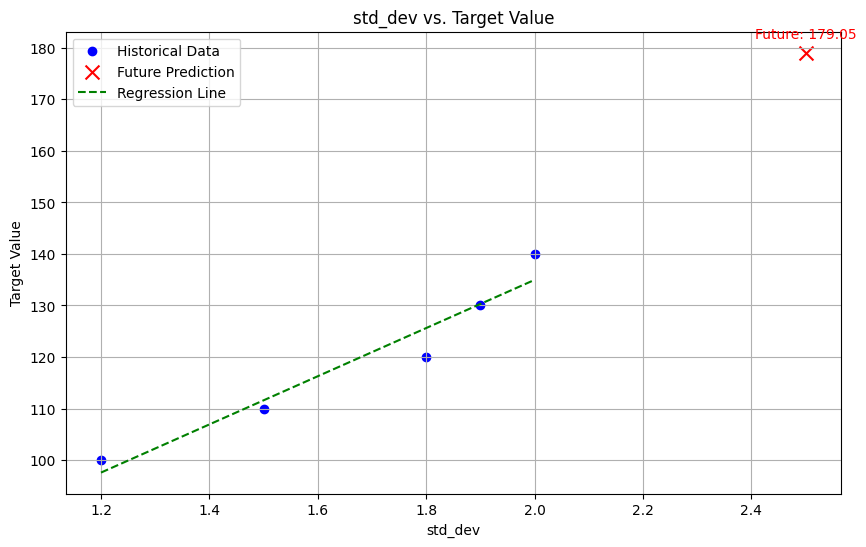

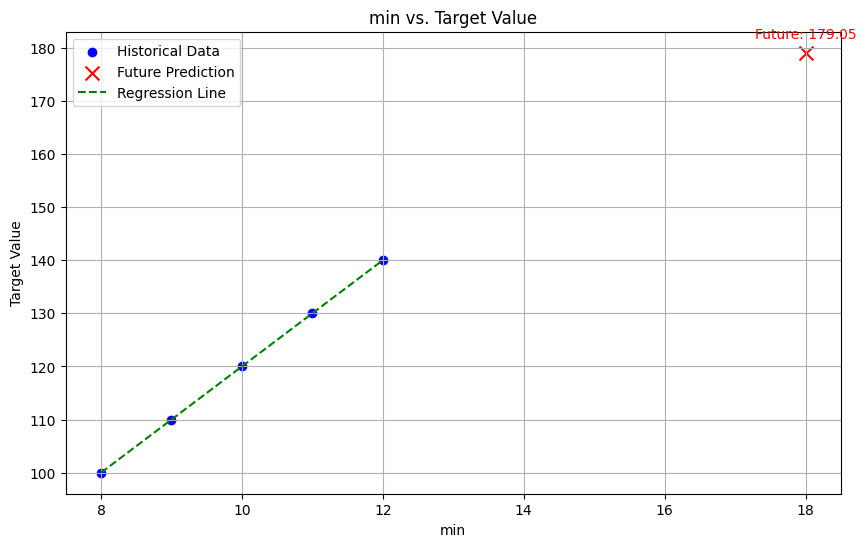

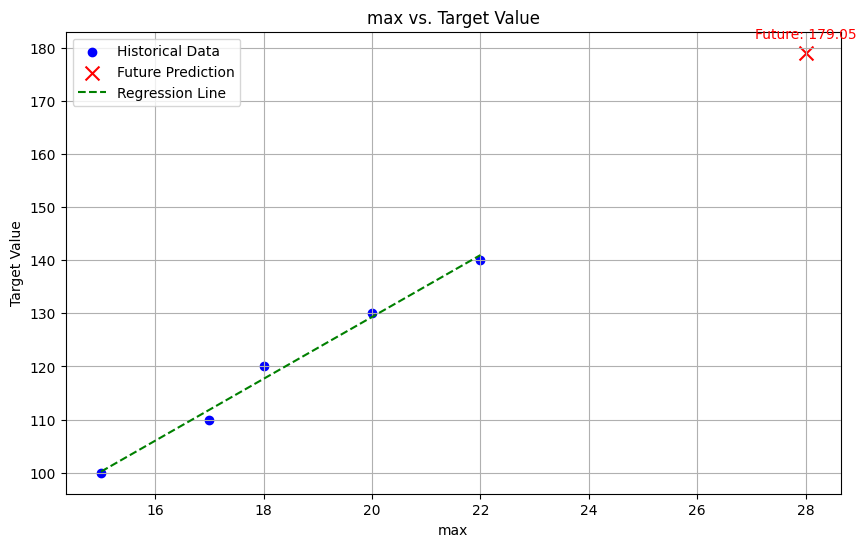

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example historical data (replace with your actual historical data)
historical_data = {
    'mean': [10, 12, 14, 16, 18],
    'std_dev': [1.2, 1.5, 1.8, 1.9, 2.0],
    'min': [8, 9, 10, 11, 12],
    'max': [15, 17, 18, 20, 22],
    'target': [100, 110, 120, 130, 140]
}

# Create DataFrame from historical data
historical_df = pd.DataFrame(historical_data)

# Example future data (replace with actual future data)
future_data = {
    'mean': [25],
    'std_dev': [2.5],
    'min': [18],
    'max': [28]
}

# Future prediction
future_target = future_prediction[0]  # Replace with your actual prediction

features = ['mean', 'std_dev', 'min', 'max']

for feature in features:
    plt.figure(figsize=(10, 6))

    # Scatter plot
    plt.scatter(historical_df[feature], historical_df['target'], color='blue', label='Historical Data')
    plt.scatter(future_data[feature][0], future_target, color='red', marker='x', s=100, label='Future Prediction')

    # Fit a linear regression model
    X = historical_df[[feature]].values
    y = historical_df['target'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # Plot regression line
    plt.plot(X, y_pred, color='green', linestyle='--', label='Regression Line')

    # Annotate the future prediction
    plt.annotate(f'Future: {future_target:.2f}',
                 (future_data[feature][0], future_target),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 color='red')

    # Plot labels and title
    plt.xlabel(feature)
    plt.ylabel('Target Value')
    plt.title(f'{feature} vs. Target Value')
    plt.legend()
    plt.grid(True)
    plt.show()


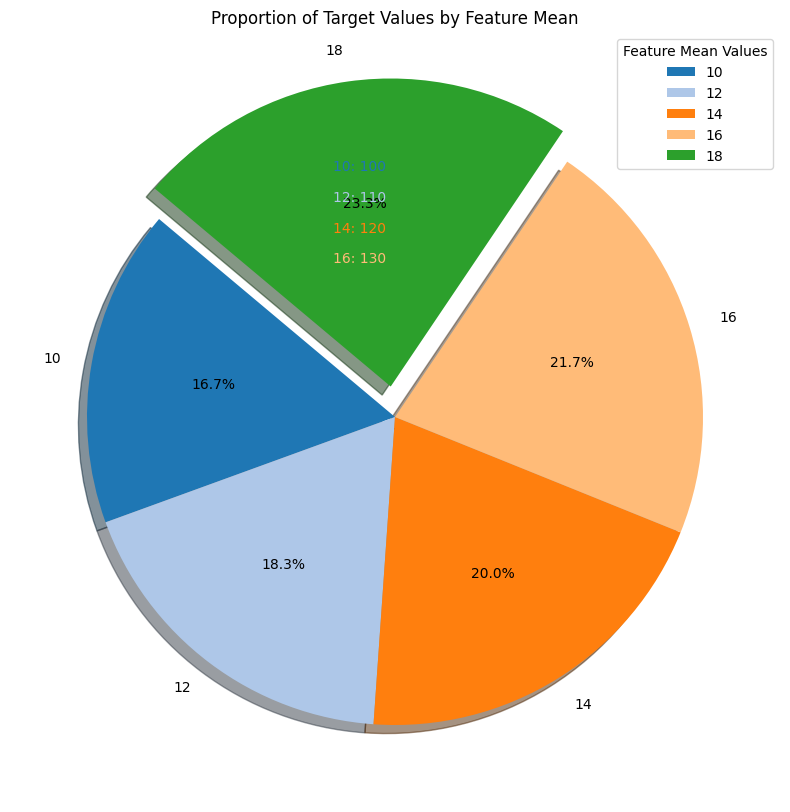

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example historical data (replace with your actual historical data)
historical_data = {
    'mean': [10, 12, 14, 16, 18],
    'std_dev': [1.2, 1.5, 1.8, 1.9, 2.0],
    'min': [8, 9, 10, 11, 12],
    'max': [15, 17, 18, 20, 22],
    'target': [100, 110, 120, 130, 140]
}

# Create DataFrame from historical data
historical_df = pd.DataFrame(historical_data)

# Aggregate data by feature mean
# Calculate the sum of target values for each feature's unique value
feature_sums = historical_df.groupby('mean')['target'].sum()

# Prepare data for the pie chart
labels = feature_sums.index
sizes = feature_sums.values

# Define explode to highlight a slice (optional)
explode = [0.1 if i == np.argmax(sizes) else 0 for i in range(len(sizes))]

# Define custom colors (optional)
colors = plt.get_cmap('tab20').colors

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        explode=explode, colors=colors, shadow=True)

# Add a legend
plt.legend(labels, title="Feature Mean Values", loc="best")

# Add annotations (if needed)
for i, (label, size) in enumerate(zip(labels, sizes)):
    plt.text(x=-0.2, y=0.8 - i*0.1, s=f'{label}: {size}', color=colors[i])

plt.title('Proportion of Target Values by Feature Mean')
plt.show()


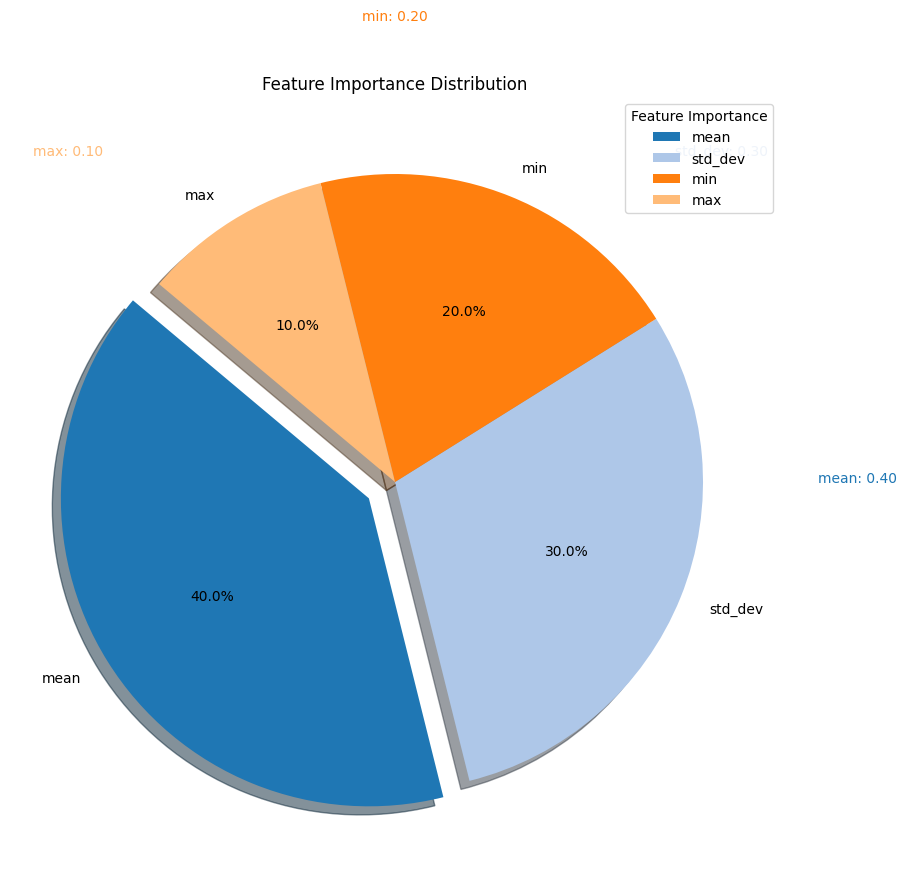

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example feature importance data (replace with your actual data)
feature_importance = {
    'mean': 0.4,
    'std_dev': 0.3,
    'min': 0.2,
    'max': 0.1
}

# Prepare data for the pie chart
labels = feature_importance.keys()
sizes = feature_importance.values()

# Define explode to highlight a slice (optional)
# Highlight the most important feature
explode = [0.1 if size == max(sizes) else 0 for size in sizes]

# Define custom colors (optional)
colors = plt.get_cmap('tab20').colors

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140,
        explode=explode, colors=colors, shadow=True)

# Add a legend
plt.legend(labels, title="Feature Importance", loc="best")

# Add annotations (optional)
for i, (label, size) in enumerate(zip(labels, sizes)):
    plt.text(x=np.cos(np.deg2rad(45 * i)) * 1.5,
             y=np.sin(np.deg2rad(45 * i)) * 1.5,
             s=f'{label}: {size:.2f}',
             color=colors[i],
             ha='center')

plt.title('Feature Importance Distribution')
plt.show()
